# OpenCV Practice

In [2]:
import numpy as np
import cv2

In [2]:
#check version
print(cv2.__version__)

4.1.0


### Read, Display and Write

In [3]:
#load an image in grayscale
img = cv2.imread('/home/tauqeer/Desktop/karachi.jpg', 0)

In [4]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
#resizable image
#use when we have too large image in dimension
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
#save image
cv2.imwrite('KHI.jpg', img)

True

#### program for saving the image if you press ‘s’ and exit, or simply exit without saving if you press ESC key.

In [8]:
img = cv2.imread('/home/tauqeer/Desktop/karachi.jpg', 0)
cv2.imshow('image for program', img)
arg = cv2.waitKey(0)

if arg == 27:
    cv2.destroyAllWindows()
elif arg==ord('s'):
    cv2.imwrite('KHI_Program.jpg', img)
    cv2.destroyAllWindows()

In [2]:
#by using matplotlib
from matplotlib import pyplot as plt

img = cv2.imread('/home/tauqeer/Desktop/karachi.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

<Figure size 640x480 with 1 Axes>

### Video from camera

In [2]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


In [10]:
cap = cv2.VideoCapture('/home/tauqeer/Desktop/supersoft/videos/last.mp4')
try:
    while(True):
        ret, frame = cap.read()

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        cv2.imshow('frame',gray)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break
except:
    cap.release()
    cv2.destroyAllWindows()

### Drawing Functions

In [6]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)
cv2.imshow('', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
len(img)

390

In [31]:
# Draw a diagonal blue line with thickness of 5 px
img = cv2.imread('/home/tauqeer/Desktop/karachi.jpg')
img = cv2.line(img,(300,150),(400,300),(0,256,0),10)
cv2.imshow('', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
img = cv2.rectangle(img,(300,150),(400,300),(0,255,0),3)
cv2.imshow('', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

img = cv2.circle(img,(447,63), 63, (0,0,255), -1)
cv2.imshow('', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
cv2.imshow('', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
print(pts.shape)
print(pts)
pts = pts.reshape((-1,2,2))
print(pts.shape)
print(pts)
# img = cv2.polylines(img,[pts],True,(0,255,255))
# cv2.imshow('', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

(4, 2)
[[10  5]
 [20 30]
 [70 20]
 [50 10]]
(2, 2, 2)
[[[10  5]
  [20 30]]

 [[70 20]
  [50 10]]]


### Mouse Callback

In [22]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print (events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [31]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)

# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()


In [39]:
img = cv2.imread('/home/tauqeer/Desktop/karachi.jpg')
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()


In [40]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()


### Trackbar as the Color Palette

In [5]:
def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()


In [2]:
img = cv2.imread('/home/tauqeer/Desktop/karachi.jpg')
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
px = img[100,100]
print(px)

In [18]:
blue = img[100,100,0]
print (blue)

255


In [41]:
np.random.seed(1)
x = np.random.randint(9, size=(3, 3))
x

array([[5, 8, 5],
       [0, 0, 1],
       [7, 6, 2]])

In [46]:
x.item(1)

8

In [47]:
img.item(100,100,0)

255

In [7]:
car = img[150:215, 0:140]
img[150:215, 0:140] = car

In [17]:
cv2.imshow('image',car)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
b,g,r = cv2.split(img)

In [21]:
img = cv2.merge((b,g,r))

In [19]:
b = img[:,:,0]
b

array([[254, 254, 254, ...,  68,  58,  54],
       [254, 254, 254, ...,  74,  66,  62],
       [254, 254, 254, ...,  81,  76,  72],
       ...,
       [195, 191, 197, ...,  75,  74,  73],
       [187, 181, 188, ...,  72,  71,  70],
       [195, 190, 194, ...,  71,  70,  69]], dtype=uint8)

In [22]:
b

array([[254, 254, 254, ...,  68,  58,  54],
       [254, 254, 254, ...,  74,  66,  62],
       [254, 254, 254, ...,  81,  76,  72],
       ...,
       [195, 191, 197, ...,  75,  74,  73],
       [187, 181, 188, ...,  72,  71,  70],
       [195, 190, 194, ...,  71,  70,  69]], dtype=uint8)

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('/home/tauqeer/Desktop/karachi.jpg')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

# plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
# plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
# plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
# plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
# plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
# plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

# we can also use cv2 method for display rather than to use matplotlib method
cv2.imshow('orignal', img1)
cv2.imshow('replicate', replicate)
cv2.imshow('reflect', reflect)
cv2.imshow('reflect_101', reflect101)
cv2.imshow('wrap', wrap)
cv2.imshow('constant', constant)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
x = np.uint8([250])
y = np.uint8([10])

In [11]:
print (cv2.add(x,y))     # 250+10 = 260 => 255
print (x,y)

[[255]]
[250] [10]


In [14]:
print (x+y)     # 250+10 = 260 % 256 = 4

[4]


In [23]:
img1 = cv2.imread('/home/tauqeer/Desktop/object-detection/images/mehran-579x414.png')
img2 = cv2.imread('/home/tauqeer/Desktop/object-detection/images/781_1_17898.jpg')

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)   #it will show error when we dont have images with same scaling

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
# Load two images
img1 = cv2.imread('/home/tauqeer/Desktop/object-detection/images/mehran-579x414.png')
img2 = cv2.imread('/home/tauqeer/Desktop/object-detection/images/781_1_17898.jpg')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
img1 = cv2.imread('/home/tauqeer/Desktop/karachi.jpg')

e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
t

0.578619356

In [41]:
# check if optimization is enabled
cv2.useOptimized()

True

In [44]:
img = cv2.imread('/home/tauqeer/Desktop/karachi.jpg')
%timeit res = cv2.medianBlur(img,49)


27.3 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
cv2.setUseOptimized(False)


In [46]:
cv2.useOptimized()

False

In [47]:
 %timeit res = cv2.medianBlur(img,49)

27.6 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
flags

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

In [12]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()


[[[ 60 255 255]]]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd719cb4668>,
 <Figure size 7200x3600 with 0 Axes>)

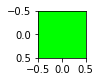

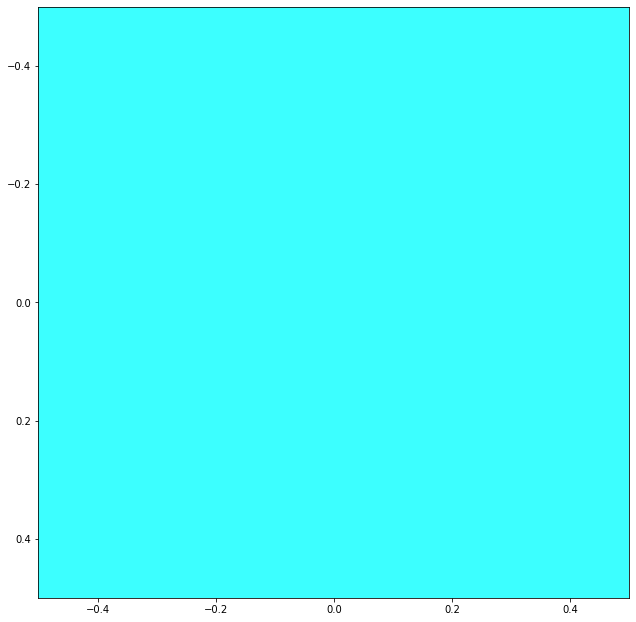

<Figure size 7200x3600 with 0 Axes>

In [41]:
green = np.uint8([[[0,255,0]]])
hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print (hsv_green)
# cv2.imshow('img', green)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.subplot(432),plt.imshow(green),plt.figure(figsize=(100,50))
plt.subplot(433),plt.imshow(hsv_green),plt.figure(figsize=(100,50))

In [22]:
g = np.uint8([[0,255,0]])
print(g)

[[  0 255   0]]


In [88]:
img = cv2.imread('/home/tauqeer/Desktop/lenri.jpg',0)
print (img.size)
print (img.shape)

921600
(1280, 720)


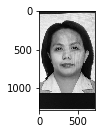

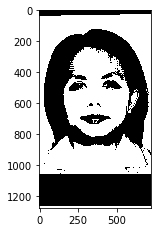

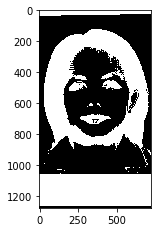

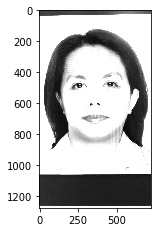

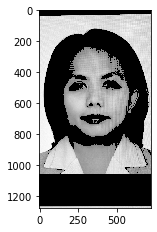

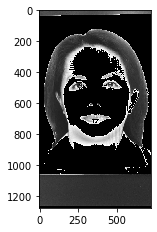

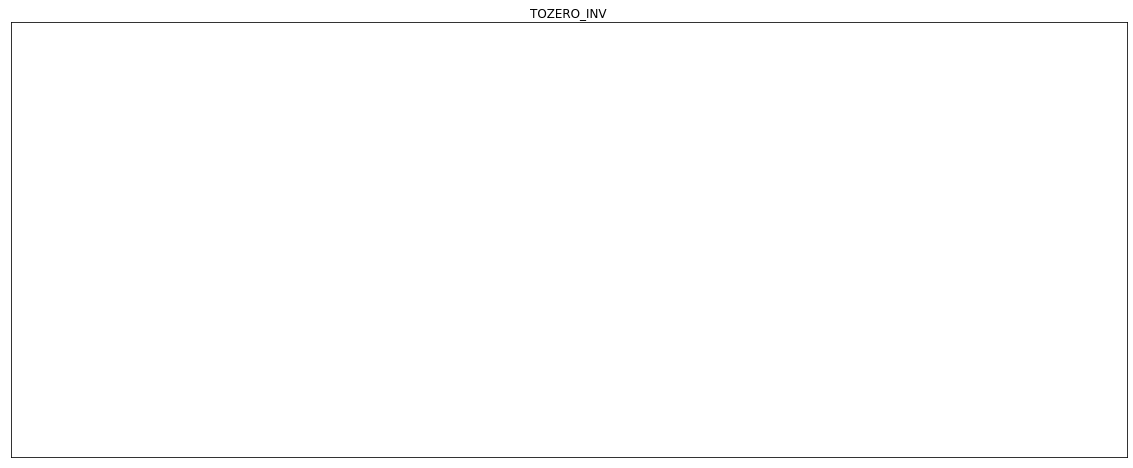

In [90]:
res, thresh1 = cv2.threshold(img,127, 255, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]


for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i], 'gray'),plt.figure(figsize=(20,8))
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


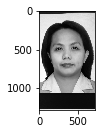

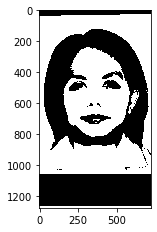

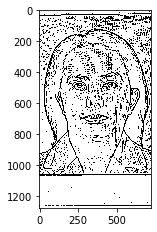

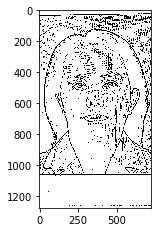

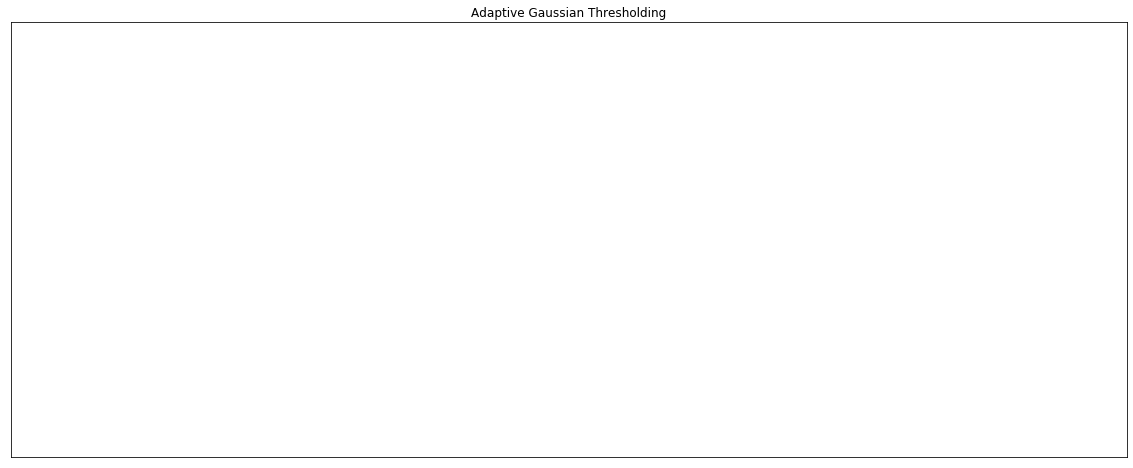

In [87]:
img = cv2.imread('/home/tauqeer/Desktop/lenri.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray'),plt.figure(figsize=(20,8))
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


In [81]:
img = cv2.imread('/home/tauqeer/Desktop/karachi.jpg')

res = cv2.resize(img,None,fx=1, fy=1, interpolation = cv2.INTER_CUBIC)

In [82]:
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

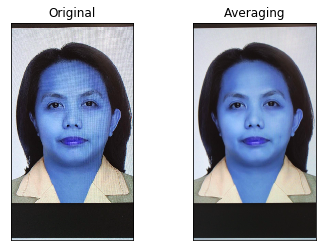

In [86]:
img = cv2.imread('/home/tauqeer/Desktop/lenri.jpg')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img, 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst, 'gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [1]:
import cv2
import numpy as np

img = cv2.imread('/home/tauqeer/Desktop/lenri.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,50],[0,1,25]])
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [36]:
img = cv2.imread('/home/tauqeer/Desktop/lenri.jpg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),180,1)
dst = cv2.warpAffine(img,M,(cols,rows))

In [37]:
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [40]:
import matplotlib.pyplot as plt

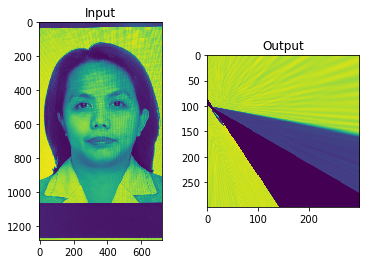

In [57]:
pts1 = np.float32([[50,50],[200,50],[50,200],[200,200]])
pts2 = np.float32([[10,100],[200,50],[100,250],[20,125]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img, M, (300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

/home/tauqeer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


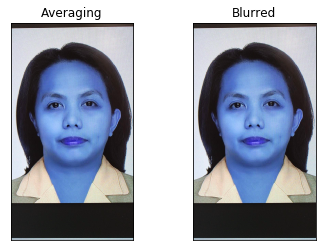

In [88]:

img = cv2.imread('/home/tauqeer/Desktop/lenri.jpg')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D (img,-1,kernel)

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(121),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


In [93]:
img.size

2764800

In [1]:
import cv2
cap = cv2.VideoCapture(0)
while (True):
    ret, frame = cap.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()



In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
img = cv2.imread('/home/tauqeer/Desktop/j.png',0)
kernel = np.ones((5,5), np.uint8)

In [31]:
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)

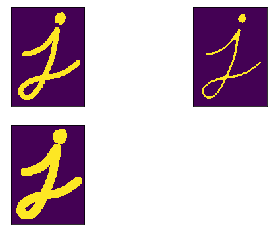

In [58]:
images = [img,erosion, dilation]
for i in range(len(images)):
    plt.subplot(2,2,i+1),plt.imshow(images[i]), plt.xticks([]), plt.yticks([]), 
    
plt.show()

numpy.ndarray

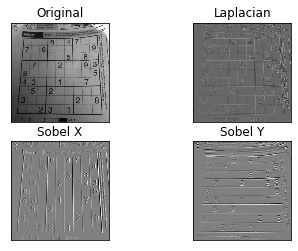

In [28]:
img = cv2.imread('/home/tauqeer/Desktop/dave.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

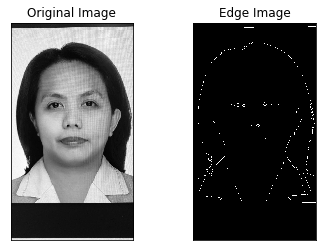

In [59]:
img = cv2.imread('/home/tauqeer/Desktop/lenri.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [72]:
# Apple and Orange
import cv2
A = cv2.imread('/home/tauqeer/Desktop/apple.jpg')
B = cv2.imread('/home/tauqeer/Desktop/orange.jpg')

In [76]:
print (A.shape)
print (B.shape)

(288, 420, 3)
(288, 420, 3)


In [74]:
import numpy as np

In [75]:
A = np.resize(A, (288,420,3))
B = np.resize(B, (288,420,3))

In [84]:
import numpy as np
import cv2

im = cv2.imread('/home/tauqeer/Desktop/lenri.jpg')
#imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(area,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [65]:
img = im
img = cv2.drawContours(img, contours, -1, (0,255,0), 3)

In [66]:
img = cv2.drawContours(img, contours, 3, (0,255,0), 3)

In [61]:
cnt = contours[4]
img = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)

In [ ]:
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
import numpy as np
import cv2

im = cv2.imread('/home/tauqeer/Desktop/lenri.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [50]:
img = cv2.drawContours(im, contours, -1, (0,255,0), 3)

In [51]:
cv2.imshow('img', imgray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [63]:
img = cv2.imread('/home/tauqeer/Desktop/lenri.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print (M)

{'m00': 6274.0, 'm10': 2308719.6666666665, 'm01': 7990723.833333333, 'm20': 1114192609.0, 'm11': 2940222514.583333, 'm02': 10177226826.5, 'm30': 602195072634.9, 'm21': 1418926108971.6833, 'm12': 3744475435763.55, 'm03': 12962074474729.05, 'mu20': 264625108.32205236, 'mu11': -220785.5312218666, 'mu02': 40441.32286453247, 'mu30': -2562462048.9989014, 'mu21': 24933985.382385254, 'mu12': 578566.3308009524, 'mu03': -2580.134765625, 'nu20': 6.722673510628395, 'nu11': -0.005608950154755858, 'nu02': 0.0010273923426241502, 'nu30': -0.8218568062673401, 'nu21': 0.007997061108432624, 'nu12': 0.00018556320747526825, 'nu03': -8.275249653138585e-07}


In [64]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [65]:
area = cv2.contourArea(cnt)

In [71]:
cv2.circle(img, (cx, cy), 5, (255, 255, 255), -1)
cv2.putText(img, "centroid", (cx - 25, cy - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
# display the image
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Image Matching

In [86]:
import cv2
import numpy as np

img1 = A #cv2.imread('star.jpg',0)
img2 = B #cv2.imread('star2.jpg',0)

ret, thresh = cv2.threshold(img1, 127, 255,0)
ret, thresh2 = cv2.threshold(img2, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_FLOODFILL,cv2.CHAIN_APPROX_SIMPLE)
cnt1 = contours[0]
contours,hierarchy = cv2.findContours(thresh2,2,1)
cnt2 = contours[0]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print (ret)


error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'
